In [1]:
import pandas as pd
import numpy as np
from math import floor
import seaborn as sns
from sklearn.utils import shuffle
from sklearn import preprocessing
import matplotlib.pyplot as plt
import Script.Image as Image
import Script.Processing as Processing
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# DATA EXPLORATION

In [2]:
training = pd.read_csv('Data/Final.csv', index_col = 0)

In [4]:
validation = pd.read_csv('Data/Validation.csv', index_col = 0, header = 0) 

C:\Users\remot\.conda\envs\Blanca\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
training = training.reset_index(drop = True)
cols = ['B1','B2','B3','B4','B5','B6','B7','B8', 'B8A', 'B9','B10','B11','B12']
X = training[cols]
Y = training['Content']

### 1) Descriptive statistics

In [5]:
training.describe()

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B10,B11,B12,Content
count,286769.000000,286769.000000,286769.000000,286769.000000,286769.000000,286769.000000,286769.000000,286769.000000,286769.000000,286769.000000,286769.000000,286769.000000,286769.000000,286769.000000
mean,674.585398,803.044740,971.210800,916.902210,1089.927206,1355.768078,1483.760190,1462.818282,1550.150891,1569.007836,1260.858248,900.118503,304.008163,2.779153
std,428.380155,415.194534,396.214759,439.550517,467.536768,727.703443,878.227486,930.223421,994.767000,999.257045,930.102548,764.671374,182.404927,2.022025
min,1.000000,23.000000,283.000000,197.000000,304.000000,252.000000,254.000000,236.000000,224.000000,199.000000,132.000000,84.000000,67.000000,1.000000
25%,305.000000,403.000000,550.000000,516.000000,650.000000,611.000000,618.000000,541.000000,606.000000,563.000000,507.000000,394.000000,186.000000,1.000000
50%,525.000000,699.000000,978.000000,912.000000,1121.000000,1227.000000,1209.000000,1136.000000,1147.000000,1278.000000,798.000000,608.000000,204.000000,1.000000
75%,1126.000000,1218.000000,1316.000000,1250.000000,1382.000000,1996.000000,2251.000000,2302.000000,2450.000000,2520.000000,1889.000000,1038.000000,563.000000,5.000000
max,1647.000000,2620.000000,3286.000000,3708.000000,3978.000000,4253.000000,4850.000000,4844.000000,5315.000000,4420.000000,5508.000000,5470.000000,577.000000,6.000000


### 2) Spectral signature

In [5]:
mean_deep = deep_water[cols].mean()
mean_shall = shallow_water[cols].mean()
mean_veg = veg[cols].mean()
mean_dry = dry[cols].mean()
mean_fall = fall[cols].mean()
mean_city = city[cols].mean()

std_deep = deep_water[cols].std()
std_shall = shallow_water[cols].std()
std_veg = veg[cols].std()
std_dry = dry[cols].std()
std_fall = fall[cols].std()
std_city = city[cols].std()

colors = ['dodgerblue', 'paleturquoise', 'peru', 'rosybrown', 'forestgreen', 'firebrick']
labels = ['Deep Water Bodies', 'Shallow Water Bodies', 'Dry land', 'Soil', 'Vegetation', 'Urban']
plt.plot(mean_deep, color = colors[0], label = labels[0])
#plt.fill_between(cols,mean_deep-std_deep, mean_deep+std_deep, color=colors[0], alpha=0.2)
plt.plot(mean_shall, color = colors[1], label = labels[1])
#plt.fill_between(cols,mean_shall-std_shall, mean_shall+std_shall, color=colors[1], alpha=0.3)
plt.plot(mean_dry, color = colors[2], label = labels[2])
#plt.fill_between(cols,mean_dry-std_dry, mean_dry+std_dry, color=colors[2], alpha=0.2)
plt.plot(mean_fall, color = colors[3], label = labels[3])
#plt.fill_between(cols,mean_fall-std_fall, mean_fall+std_fall, color=colors[3], alpha=0.2)
plt.plot(mean_veg, color = colors[4], label = labels[4])
#plt.fill_between(cols,mean_veg-std_veg, mean_veg+std_veg, color=colors[4], alpha=0.2)
plt.plot(mean_city, color = colors[5], label = labels[5])
#plt.fill_between(cols,mean_city-std_city, mean_city+std_city, color=colors[5], alpha=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Band')
plt.ylabel('Value')
plt.grid(axis = 'y')

NameError: name 'deep_water' is not defined

In [ ]:
deep_water = training[training.Content==1]

In [14]:
validation.head()

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B10,B11,B12
0,280.0,392.0,779.0,463.0,1291.0,3204.0,3771.0,3576.0,4016.0,3989.0,2336.0,1193.0,114.0
1,280.0,407.0,802.0,443.0,1291.0,3204.0,3771.0,3752.0,4016.0,3989.0,2336.0,1193.0,114.0
2,280.0,380.0,799.0,439.0,1309.0,3337.0,3838.0,3868.0,4043.0,3989.0,2410.0,1263.0,114.0
3,280.0,386.0,807.0,448.0,1309.0,3337.0,3838.0,3577.0,4043.0,3989.0,2410.0,1263.0,114.0
4,280.0,389.0,773.0,487.0,1274.0,3032.0,3459.0,3333.0,3580.0,3989.0,2597.0,1466.0,114.0


### 1) Outliers

In [6]:
training["Content"] = [3 if x==6 else x for x in training.Content]

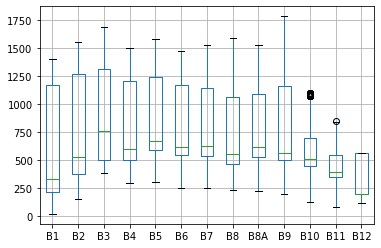

In [7]:
deep_water = training[training.Content==1]
deep_water[cols].boxplot()
plt.savefig('Figures/{0}.png'.format('deep_water_boxplt'))

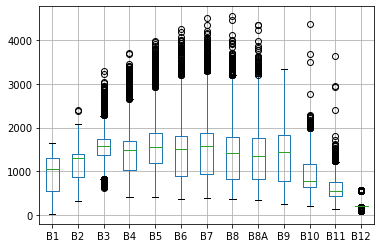

In [8]:
shallow_water = training[training.Content==2]
shallow_water[cols].boxplot()
plt.savefig('Figures/{0}.png'.format('shall_water_boxplt'))

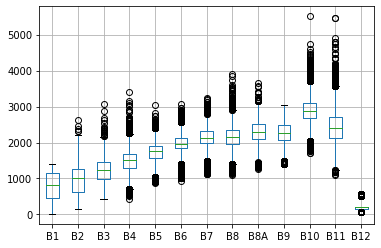

In [9]:
dry = training[training.Content==3]
dry[cols].boxplot()
plt.savefig('Figures/{0}.png'.format('dry_urban_boxplt'))

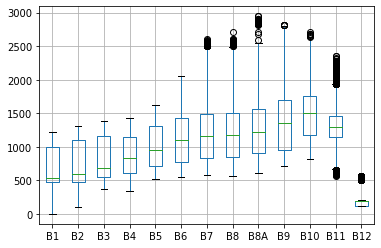

In [10]:
fall = training[training.Content==4]
fall[cols].boxplot()
plt.savefig('Figures/{0}.png'.format('veg_boxplt'))

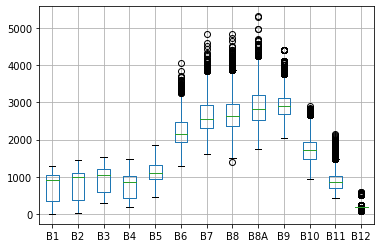

In [11]:
veg = training[training.Content==5]
veg[cols].boxplot()
plt.savefig('Figures/{0}.png'.format('fall_boxplt'))

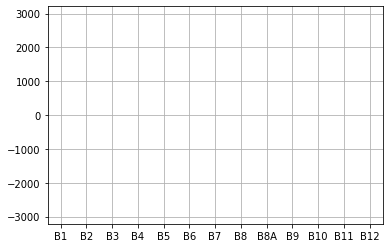

In [12]:
city = training[training.Content==6]
city[cols].boxplot()
#plt.savefig('Figures/{0}.png'.format('city_boxplt'))

### Remove percentiles

In [14]:
final = pd.DataFrame()
classes = [deep_water,shallow_water, veg, dry, fall]

for c in classes:    
    
    for b in cols:
        x = c[b]
        c = c[x.between(x.quantile(0.025), x.quantile(0.975))]
    
    final = pd.concat([final,c])

In [15]:
(155230/286769)*100

54.13067660730414

In [16]:
final.describe()
training = final

## 3) Variance

Text(0, 0.5, 'variance')

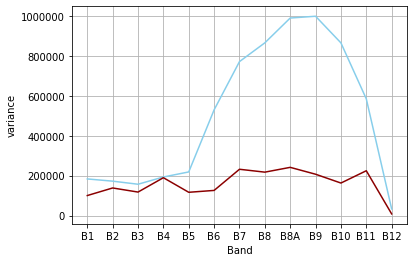

In [29]:
variance2 = validation[cols].var()
variance1 = training[cols].var()
plt.plot(variance1, color = 'skyblue')
plt.plot(variance2, color = 'darkred')
plt.grid()
plt.xlabel('Band')
plt.ylabel('variance')

# DATA PREPROCESSING

### 1) Dealing with class imbalance

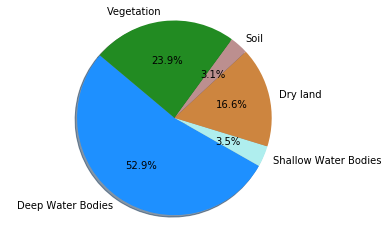

In [17]:
Image.class_piechart(training)

In [18]:
training = shuffle(training)

In [19]:
#Drop part of the large water bodies class
lwb = training.loc[training['Content'] == 1]
n = len(training.loc[training['Content'] == 5])
#n = len(training.loc[training['Content'] == 6])
training = training.drop(lwb[n:].index)
#training = training.drop(veg[n:].index)

In [20]:
X = training[cols]
Y = training['Content']

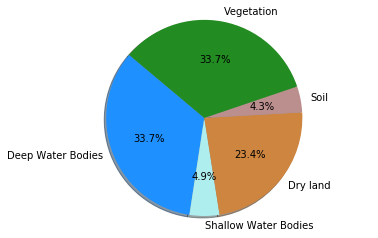

In [21]:
Image.class_piechart(training)

In [22]:
X_resampled, y_resampled = SMOTE().fit_resample(X, Y)

In [23]:
training_resampled = X_resampled
training_resampled['Content'] = y_resampled

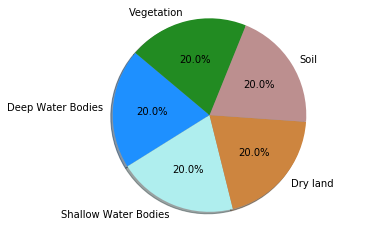

In [24]:
Image.class_piechart(training_resampled);

In [ ]:
training.describe()

### 2) Add spectral indices

In [5]:
training_indices = Processing.add_indices(training_resampled)

In [10]:
training_indices.describe()

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,Content,NDWI,MNDWI,NDVI,NDBI
count,2.131424e+07,2.131424e+07,2.131424e+07,2.131424e+07,2.131424e+07,2.131424e+07,2.131424e+07,2.131424e+07,2.131424e+07,2.131424e+07,2.131424e+07,2.131424e+07,2.131424e+07,2.131424e+07,2.131424e+07,2.131424e+07,2.131424e+07,2.131424e+07
mean,9.709687e+02,1.094422e+03,1.280531e+03,1.294337e+03,1.524642e+03,1.883043e+03,2.056072e+03,2.055390e+03,2.171742e+03,2.154066e+03,1.929160e+03,1.411114e+03,2.603937e+02,3.000000e+00,-1.995880e-01,-1.461601e-01,2.005837e-01,-5.671816e-02
std,3.859267e+02,3.617380e+02,3.667104e+02,4.276524e+02,4.631937e+02,5.988377e+02,7.054775e+02,7.293836e+02,7.910908e+02,7.306748e+02,8.497947e+02,7.781289e+02,1.531668e+02,1.414214e+00,2.037028e-01,2.648156e-01,2.000900e-01,1.541871e-01
min,1.000000e+00,1.000000e+00,2.140000e+02,1.510000e+02,2.770000e+02,2.340000e+02,2.310000e+02,2.140000e+02,2.060000e+02,1.840000e+02,1.240000e+02,4.300000e+01,6.100000e+01,1.000000e+00,-8.226117e-01,-9.321786e-01,-3.619948e-01,-7.372014e-01
25%,8.580000e+02,9.650000e+02,1.112000e+03,1.040000e+03,1.234000e+03,1.561000e+03,1.669323e+03,1.678000e+03,1.787740e+03,1.826000e+03,1.423000e+03,7.570000e+02,1.970000e+02,2.000000e+00,-3.264249e-01,-3.010690e-01,7.914659e-02,-1.918489e-01
50%,1.100000e+03,1.218000e+03,1.314000e+03,1.282000e+03,1.505000e+03,2.019000e+03,2.228047e+03,2.258000e+03,2.398000e+03,2.373605e+03,2.036000e+03,1.289068e+03,2.000000e+02,3.000000e+00,-2.168992e-01,-2.132890e-01,1.812134e-01,-5.393306e-02
75%,1.263000e+03,1.356000e+03,1.538088e+03,1.629125e+03,1.890550e+03,2.320133e+03,2.564868e+03,2.570000e+03,2.722773e+03,2.644025e+03,2.603000e+03,2.013250e+03,2.040000e+02,4.000000e+00,-1.175880e-01,-1.830710e-02,3.229225e-01,7.958884e-02
max,2.356000e+03,3.464000e+03,5.044000e+03,4.828000e+03,4.236000e+03,6.720000e+03,7.950000e+03,8.512000e+03,9.062000e+03,6.052000e+03,1.534400e+04,1.521200e+04,6.920000e+02,5.000000e+00,4.795918e-01,7.427785e-01,8.891353e-01,8.862400e-01


### 3) Standarization

In [19]:
#cols = ['B1','B2','B3','B4','B5','B6','B7','B8','B9','B10','B11','B12','B13','NDVI','NDWI','MNDWI','NDBI']
X = training_resampled[cols]
Y = training_resampled['Content']
standardized_X = preprocessing.scale(X)

In [20]:
training = pd.DataFrame(standardized_X, columns = cols)
training['Content'] = Y.values
training = training.dropna()

In [23]:
training.describe()

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B10,B11,B12,Content
count,1.857950e+05,1.857950e+05,1.857950e+05,1.857950e+05,1.857950e+05,1.857950e+05,1.857950e+05,1.857950e+05,1.857950e+05,1.857950e+05,1.857950e+05,1.857950e+05,1.857950e+05,185795.000000
mean,1.958061e-17,-2.423100e-16,-1.101409e-16,-2.202818e-17,-4.038500e-16,1.174836e-16,4.797249e-16,-2.790236e-16,-1.076933e-16,-2.202818e-16,1.325133e-16,-7.832243e-17,-2.398624e-16,3.000000
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.414217
min,-1.935732e+00,-2.096606e+00,-1.736159e+00,-1.826864e+00,-1.605374e+00,-1.667946e+00,-1.573693e+00,-1.581772e+00,-1.497145e+00,-1.588981e+00,-1.283244e+00,-1.110399e+00,-1.203331e+00,1.000000
25%,-9.889281e-01,-9.564711e-01,-9.172749e-01,-9.844167e-01,-9.420893e-01,-9.364304e-01,-8.742015e-01,-8.025954e-01,-8.404546e-01,-7.115428e-01,-9.630909e-01,-8.276570e-01,-5.195821e-01,2.000000
50%,2.589182e-01,2.453656e-01,9.413676e-02,3.607596e-03,-3.997137e-02,1.220739e-01,-1.325174e-02,-1.455042e-01,-1.854250e-01,-1.183799e-01,-1.591247e-01,-3.261899e-01,-4.842158e-01,3.000000
75%,8.982194e-01,8.462840e-01,7.551190e-01,8.812821e-01,7.784436e-01,8.295857e-01,7.900130e-01,8.323312e-01,8.516926e-01,8.439716e-01,5.201002e-01,4.342867e-01,1.531664e+00,4.000000
max,2.126282e+00,2.150062e+00,2.733048e+00,2.478647e+00,2.436655e+00,2.133592e+00,2.204898e+00,2.156999e+00,2.160155e+00,2.006916e+00,2.431964e+00,2.609260e+00,1.708496e+00,5.000000


### Save data

In [25]:
training.to_csv(r'Data/Final/nostd_training.csv')

# PCA

In [10]:
pca = PCA(n_components=len(training.columns)-1)
principalComponents = pca.fit_transform(X)

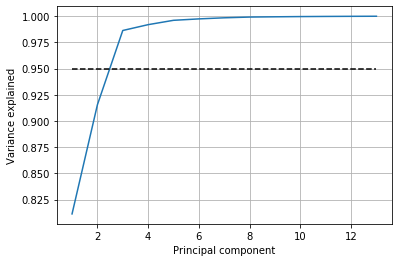

In [11]:
threshold = 0.95
rho = pca.explained_variance_/sum(pca.explained_variance_)

plt.plot(range(1,len(rho)+1), np.cumsum(rho))
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.grid()

In [12]:
np.cumsum(rho) > 0.95

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [13]:
pca_components = pd.DataFrame(pca.components_[:3])

<Figure size 432x288 with 0 Axes>

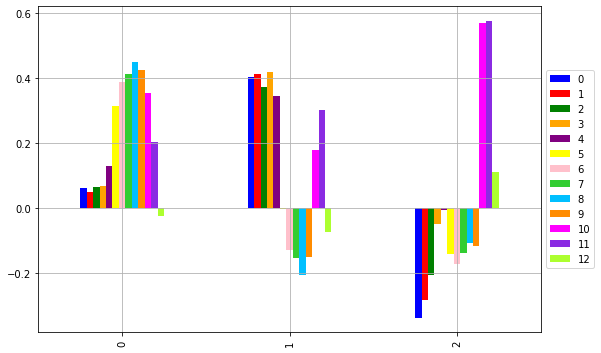

In [16]:
colors = ['blue', 'red', 'green', 'orange', 'purple', 'yellow', 'pink', 'limegreen', 'deepskyblue', 'darkorange', 'fuchsia', 
          'blueviolet', 'greenyellow', 'crimson', 'aquamarine', 'gold', 'gray']
fig = plt.figure()
ax = pca_components.plot.bar(grid = True, legend = False, color = colors )
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*1.5, box.height*1.5])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
plt.savefig('Figures/pca_components.png')

In [43]:
pca_training = pd.DataFrame(principalComponents)
pca_training = pca_training[[0,1,2]]
pca_training['Content'] = Y.values

In [45]:
pca_training.to_csv(r'Clean_data/pca_training.csv')

## RGB values

In [1]:
def RGB_hist(df):
    df['B1'].hist(bins=50, alpha= 0.3,color = 'red')
    df['B2'].hist(bins=50, alpha= 0.3,color = 'green')
    df['B3'].hist(bins=50, alpha= 0.3,color = 'blue')

In [8]:
path = "H:/sentinel2/Ghana/Validation/02-01-20/SE/020120_20.tif"
img = Image.make_dataset(path)
SE_020120 = img['df'][cols]
dim_SE_020120 = img['dim']

In [9]:
path = "H:/sentinel2/Ghana/Training/27-01-20/SE/L2A_270120_20.tif"
img = Image.make_dataset(path)
SE_270120 = img['df'][cols]
dim_SE_270120 = img['dim']

In [10]:
path = "H:/sentinel2/Ghana/Training/28-12-18/SE/L2A_281218_20.tif"
img = Image.make_dataset(path)
SE_281218 = img['df'][cols]
dim_SE_281218 = img['dim']